# Melody Peterson  

# WW Data Scientist (Food Data) Homework

The FNDDS Nutrient values.xlsx file from the USDA (U.S. Department of Agriculture) contains
the complete nutritional information from more than 7000 foods.  
(If you should need it, the background to the FNDDS study is [here](https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/) but for the modeling exercise
below, the data file is self-contained.)  

1. Predict Total Sugar  
a) Build a model from these data to predict the total sugar content / 100g ---that is, the
target variable is in column H---from the other candidate dependent variable columns
A--BQ. 
We are not looking for a perfect model. We are more interested in how you structure the
problem, any exploratory data analysis you might perform, how you select features, and
especially how you evaluate the model’s performance.  
b) Write a few sentences to explain what assumptions you would be making if applying a
model from a US nutrition dataset to the Brazilian market and, given what you know
above, how might you (in)validate those assumptions?  

2. Rank Fruit Sweetness  
Rank the basic fruit groups (cherries, bananas, apple, oranges etc) by their sweetness meaning
total sugar / 100g, Col H. 
You might find the following useful
https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/1718/Food_Category_List.pdf

## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", sheet_name = "FNDDS Nutrient Values",
                  header = 1, index_col = 0)

In [3]:
df.head()

,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)",...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
Food code,,,,,,,,,,,,,,,,,,,,,
11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,1.164,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,2.154,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [4]:
# Remove returns, spaces, and invalid characters from column names
df.index.name = 'Food_code'
for i in [", ", " ", "\n", "-", ":"]:
    df.columns = df.columns.str.replace(i, "_")
df.columns = df.columns.str.replace('(','') 
df.columns = df.columns.str.replace(')','')
df.head()

,Main_food_description,WWEIA_Category_number,WWEIA_Category_description,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,1.164,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,2.154,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [5]:
df.columns

Index(['Main_food_description', 'WWEIA_Category_number',
       'WWEIA_Category_description', 'Energy_kcal', 'Protein_g',
       'Carbohydrate_g', 'Sugars_total_g', 'Fiber_total_dietary_g',
       'Total_Fat_g', 'Fatty_acids_total_saturated_g',
       'Fatty_acids_total_monounsaturated_g',
       'Fatty_acids_total_polyunsaturated_g', 'Cholesterol_mg', 'Retinol_mcg',
       'Vitamin_A_RAE_mcg_RAE', 'Carotene_alpha_mcg', 'Carotene_beta_mcg',
       'Cryptoxanthin_beta_mcg', 'Lycopene_mcg', 'Lutein_+_zeaxanthin_mcg',
       'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Vitamin_B_6_mg',
       'Folic_acid_mcg', 'Folate_food_mcg', 'Folate_DFE_mcg_DFE',
       'Folate_total_mcg', 'Choline_total_mg', 'Vitamin_B_12_mcg',
       'Vitamin_B_12_added_mcg', 'Vitamin_C_mg', 'Vitamin_D_D2_+_D3_mcg',
       'Vitamin_E_alpha_tocopherol_mg', 'Vitamin_E_added_mg',
       'Vitamin_K_phylloquinone_mcg', 'Calcium_mg', 'Phosphorus_mg',
       'Magnesium_mg', 'Iron_mg', 'Zinc_mg', 'Copper_mg', 'Selenium_mcg'

In [6]:
df.describe()

,WWEIA_Category_number,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,Fatty_acids_total_monounsaturated_g,Fatty_acids_total_polyunsaturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
count,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,...,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000
mean,4698.965975,197.121559,8.599085,20.828039,7.336660,1.703840,8.958187,2.795032,3.217548,2.173808,...,0.040383,0.010167,1.897950,0.200369,0.002518,0.019184,0.013539,0.004915,0.023334,59.798820
std,2212.828607,140.705036,8.296889,21.887363,12.795577,2.558168,11.049585,4.102655,4.632640,3.899902,...,0.136010,0.113656,3.509074,0.834606,0.018688,0.039292,0.079486,0.019230,0.120919,26.828203
min,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3002.000000,85.000000,2.220000,5.650000,0.780000,0.100000,2.060000,0.503000,0.513000,0.338000,...,0.000000,0.000000,0.228500,0.028000,0.000000,0.000000,0.000000,0.000000,0.000000,45.895000
50%,3802.000000,166.000000,6.190000,13.300000,2.390000,1.000000,5.480000,1.444000,1.869000,1.036000,...,0.011000,0.000000,0.871000,0.089000,0.000000,0.003000,0.000000,0.000000,0.000000,66.590000
75%,6411.500000,274.000000,12.130000,26.195000,7.380000,2.100000,12.650000,3.668500,4.433000,2.625000,...,0.036000,0.000000,2.274000,0.211000,0.000000,0.020000,0.001000,0.002000,0.002000,80.605000
max,9999.000000,902.000000,78.130000,100.000000,99.800000,46.200000,100.000000,82.500000,75.221000,67.849000,...,4.674000,5.166000,65.700000,53.368000,0.664000,0.505000,2.741000,0.380000,3.800000,99.980000


## Exploratory Data Analysis

### Basic graphs

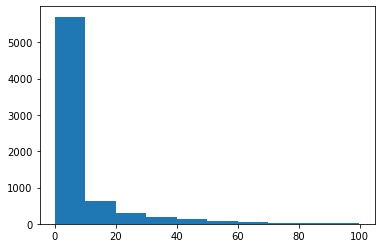

In [7]:
plt.hist(df['Sugars_total_g']);

In [8]:
df['Sugars_total_g'].value_counts()

0.00     663
0.04     113
0.88      68
1.10      60
1.15      35
        ... 
14.97      1
26.71      1
18.79      1
28.44      1
4.49       1
Name: Sugars_total_g, Length: 1788, dtype: int64

In [9]:
# I wouldn't automatically remove outliers without a closer examination of them.  However, this is my second run through
# of the regression and I know that I have issues of heteroscadasticity so I am thinking that removing outliers may help.

In [10]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

In [11]:
df_no_outliers = remove_outliers(df, 'Sugars_total_g')

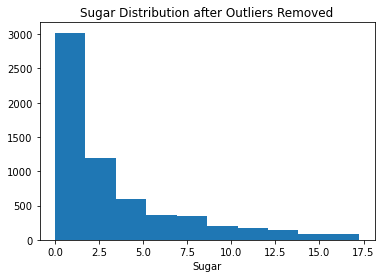

In [12]:
plt.hist(df_no_outliers["Sugars_total_g"])
plt.title("Sugar Distribution after Outliers Removed")
plt.xlabel('Sugar');

In [13]:
X = df_no_outliers.drop(columns=['Main_food_description','WWEIA_Category_number','WWEIA_Category_description', 'Sugars_total_g'])
y = df_no_outliers['Sugars_total_g']

In [14]:
X.head()

,Energy_kcal,Protein_g,Carbohydrate_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,Fatty_acids_total_monounsaturated_g,Fatty_acids_total_polyunsaturated_g,Cholesterol_mg,Retinol_mcg,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
11000000,70,1.03,6.89,0.0,4.38,2.009,1.658,0.497,14,60,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,51,3.34,4.87,0.0,1.99,1.164,0.426,0.065,8,58,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,60,3.28,4.67,0.0,3.20,1.860,0.688,0.108,12,31,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,61,3.10,4.46,0.0,3.46,2.154,0.999,0.128,14,28,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,60,3.28,4.67,0.0,3.20,1.860,0.688,0.108,12,31,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


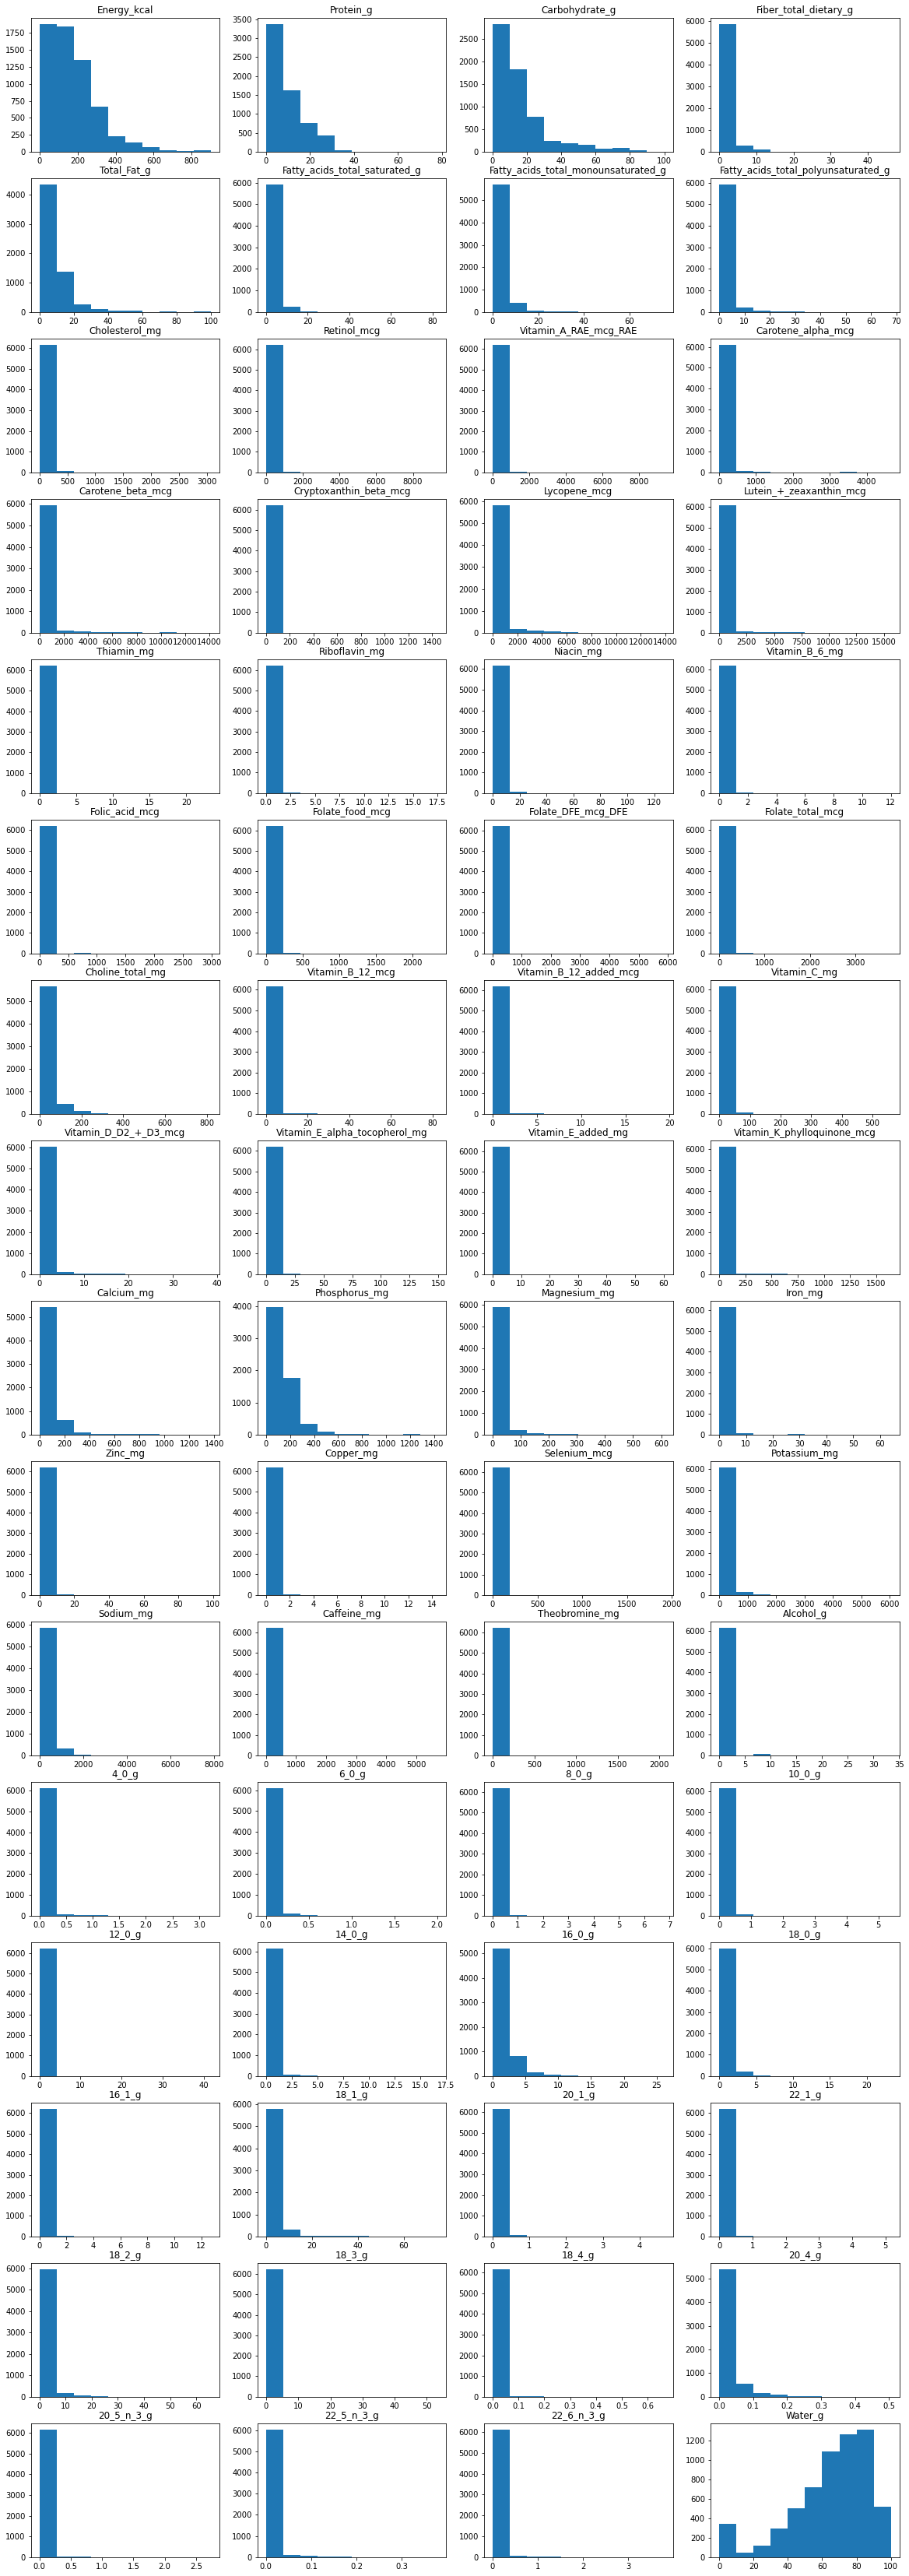

In [15]:
fig, axes = plt.subplots(nrows=16, ncols=4, figsize=(20,60))
for n in range(len(X.columns)):
    row=(n)//4
    col=(n)%4
    ax=axes[row][col]
    x=X.iloc[:,n]
    ax.hist(x)
    ax.set_title(X.columns.values[n])
plt.show()

In [16]:
# At this point I can see that the independent variables are not normally distributed.  Although it is not necessary for the
# regression it would probably improve the results.  If I had more time I would try transforming, perhaps log.

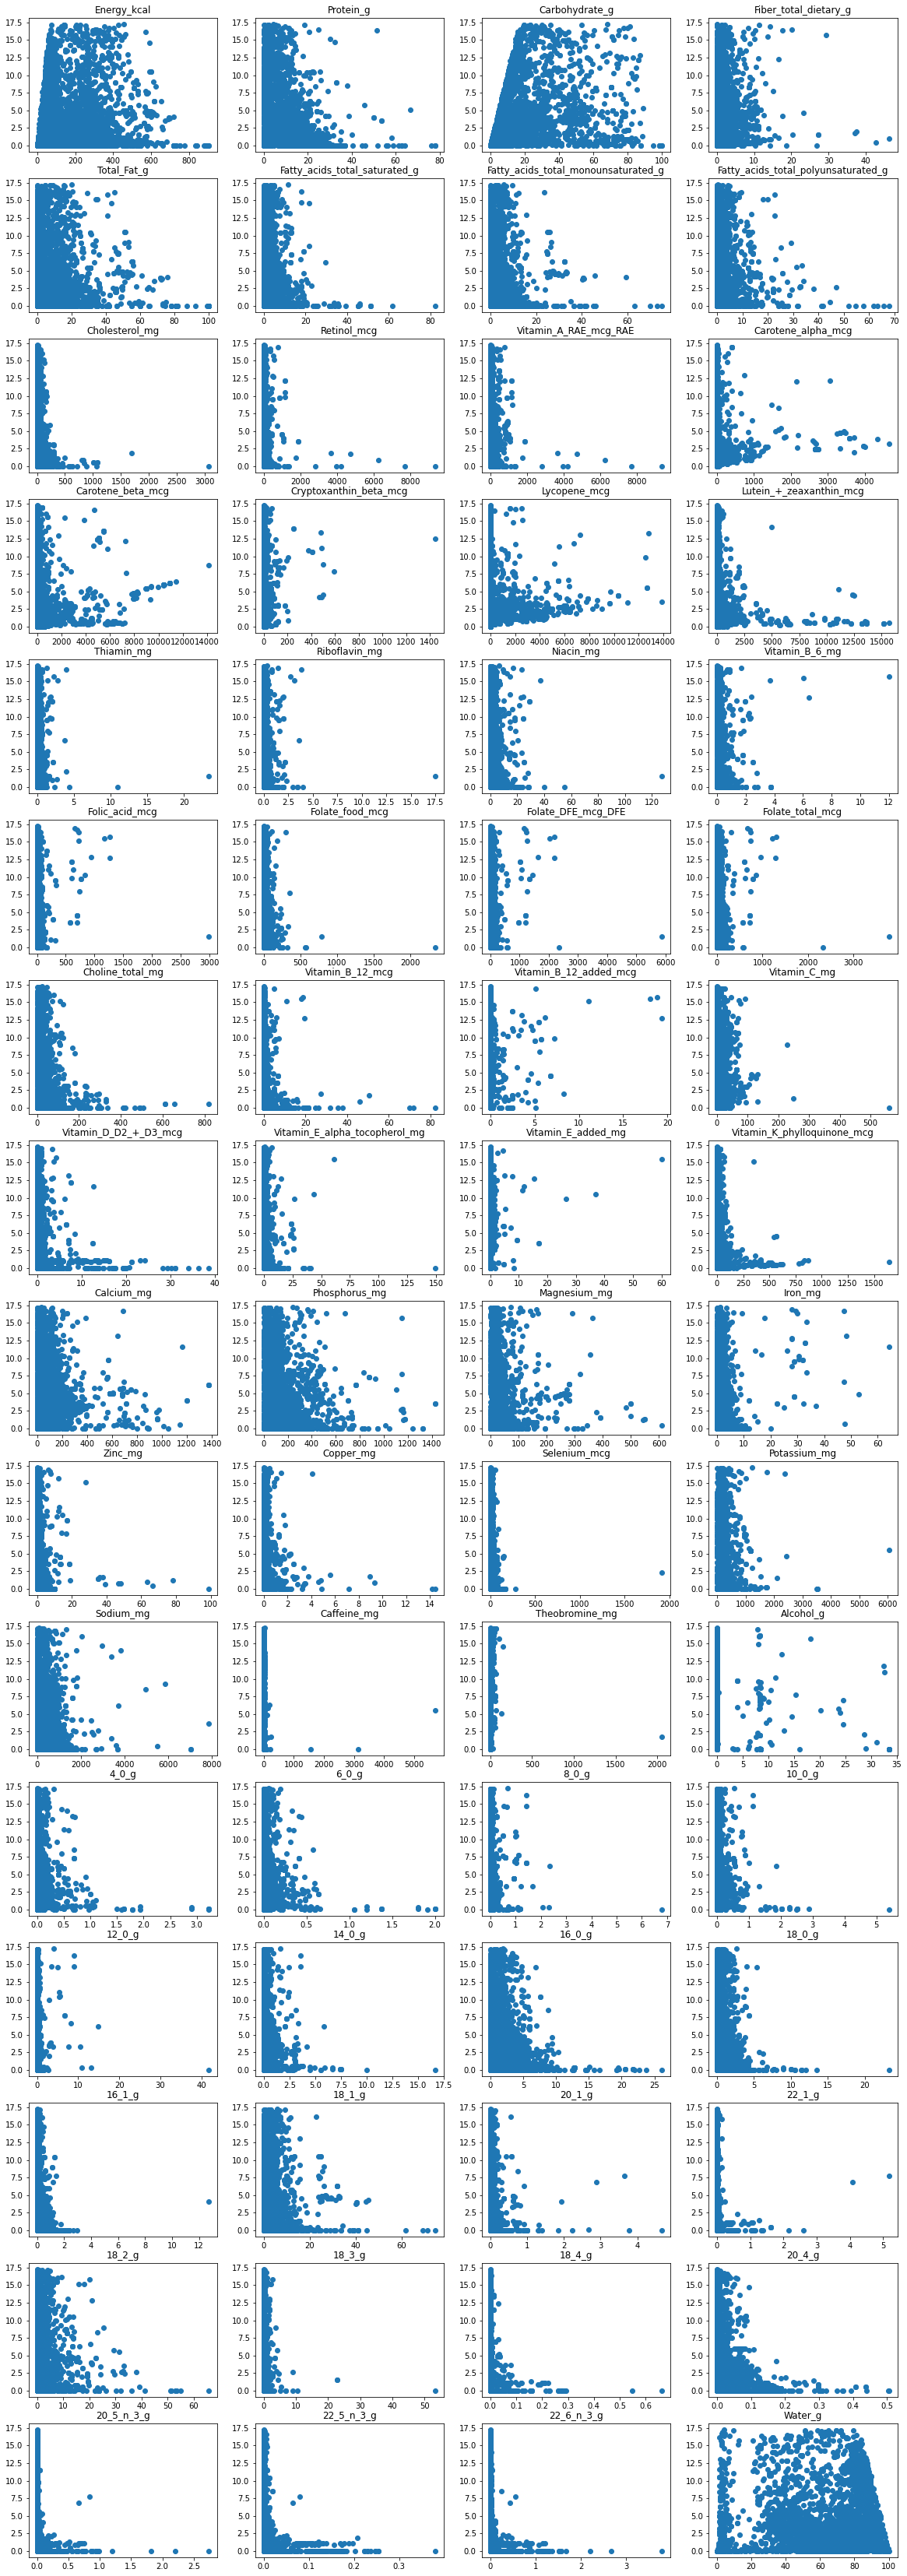

In [17]:
fig, axes = plt.subplots(nrows=16, ncols=4, figsize=(20,60))
for n, column in enumerate(X.columns):
    row=(n)//4
    col=n%4
    ax=axes[row][col]
    x=X[column]
    y=df_no_outliers['Sugars_total_g']
    ax.scatter(x, y)
    ax.set_title(X.columns.values[n])
plt.show()

In [18]:
#  Looking for linear relationships between the independent variable and sugar... not looking very linear.
# Again, a transformation may be in order or perhaps another type of regression.

## OLS regression

In [19]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape)

X_train:  (4665, 64) 
X_test:  (1556, 64)


In [21]:
def run_model(y,X):
    X_constant = sm.add_constant(X)
    model = sm.OLS(y,X_constant)
    results = model.fit()
    summary = results.summary()
    print(summary)
    return model

In [22]:
def find_high_p_values(model):
    results = model.fit()
    summary = results.summary()
    p_table = summary.tables[1]
    p_table_df = pd.DataFrame(p_table.data)
    p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
    p_table_df.drop(labels=0,axis=0,inplace=True)
    p_table_df.set_index('column',inplace=True)
    p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
    p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)
    drop_list=list(p_table_df[p_table_df['pass']==False].index)
    print(p_table_df[p_table_df['pass']==False]['P>|t|'])
    return drop_list

In [23]:
def drop_high_p_values(train, test, drop_list):
    train_dropped = train.drop(columns = drop_list)
    test_dropped = test.drop(columns = drop_list)
    return train_dropped, test_dropped

In [24]:
model1 = run_model(y_train, X_train)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     30.42
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          3.48e-299
Time:                        11:30:20   Log-Likelihood:                -12020.
No. Observations:                4665   AIC:                         2.417e+04
Df Residuals:                    4600   BIC:                         2.459e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [25]:
model1_drop_list = find_high_p_values(model1)

column
Energy_kcal                            0.789
Protein_g                              0.123
Fatty_acids_total_monounsaturated_g    0.437
Fatty_acids_total_polyunsaturated_g    0.710
Retinol_mcg                            0.106
Vitamin_A_RAE_mcg_RAE                  0.105
Carotene_alpha_mcg                     0.139
Carotene_beta_mcg                      0.099
Lycopene_mcg                           0.791
Lutein_+_zeaxanthin_mcg                0.153
Thiamin_mg                             0.228
Vitamin_B_6_mg                         0.517
Folic_acid_mcg                         0.844
Folate_food_mcg                        0.362
Folate_DFE_mcg_DFE                     0.714
Folate_total_mcg                       0.608
Choline_total_mg                       0.773
Vitamin_B_12_mcg                       0.534
Vitamin_E_alpha_tocopherol_mg          0.094
Iron_mg                                0.383
Zinc_mg                                0.251
Copper_mg                              0.326
Sod

In [26]:
X_train2, X_test2 = drop_high_p_values(X_train, X_test, model1_drop_list)
model2 = run_model(y_train, X_train2)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     65.05
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          1.76e-307
Time:                        11:30:20   Log-Likelihood:                -12070.
No. Observations:                4665   AIC:                         2.420e+04
Df Residuals:                    4636   BIC:                         2.439e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [27]:
model2_drop_list = find_high_p_values(model2)

column
Vitamin_C_mg          0.053
Vitamin_E_added_mg    0.117
Magnesium_mg          0.065
22_5_n_3_g            0.093
Name: P>|t|, dtype: float64


In [28]:
X_train3, X_test3 = drop_high_p_values(X_train2, X_test2, model2_drop_list)
model3 = run_model(y_train, X_train3)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     75.19
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          2.25e-308
Time:                        11:30:20   Log-Likelihood:                -12077.
No. Observations:                4665   AIC:                         2.420e+04
Df Residuals:                    4640   BIC:                         2.436e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [29]:
model3_drop_list = find_high_p_values(model3)

column
Vitamin_D_D2_+_D3_mcg    0.109
Phosphorus_mg            0.118
Name: P>|t|, dtype: float64


In [30]:
X_train4, X_test4 = drop_high_p_values(X_train3, X_test3, model3_drop_list)
model4 = run_model(y_train, X_train4)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     81.79
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          2.27e-309
Time:                        11:30:20   Log-Likelihood:                -12079.
No. Observations:                4665   AIC:                         2.420e+04
Df Residuals:                    4642   BIC:                         2.435e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [31]:
model4_drop_list = find_high_p_values(model4)

Series([], Name: P>|t|, dtype: float64)


### Checking multicollinearity

In [32]:
vif = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif_list=list(zip(X_train4.columns, vif))

In [33]:
vif_list

[('Carbohydrate_g', 2.6345831651641785),
 ('Fiber_total_dietary_g', 2.4837540984713264),
 ('Total_Fat_g', 10.587515934783472),
 ('Fatty_acids_total_saturated_g', 657.8068593878182),
 ('Cholesterol_mg', 2.110012363959546),
 ('Cryptoxanthin_beta_mcg', 1.0363467416944774),
 ('Riboflavin_mg', 3.0324795515087843),
 ('Niacin_mg', 5.306134426230139),
 ('Vitamin_B_12_added_mcg', 1.1761332240545919),
 ('Vitamin_K_phylloquinone_mcg', 1.176493941669444),
 ('Calcium_mg', 1.9995809772543365),
 ('Selenium_mcg', 3.4449867558789102),
 ('Potassium_mg', 4.691529997790758),
 ('Caffeine_mg', 1.571515113688991),
 ('Theobromine_mg', 1.0761423956850447),
 ('Alcohol_g', 1.0223117846901355),
 ('10_0_g', 11.113688517967883),
 ('12_0_g', 6.0814449440208),
 ('14_0_g', 35.49072888452457),
 ('16_0_g', 175.87636361691546),
 ('18_0_g', 44.24364707366392),
 ('Water_g', 2.1078603579869934)]

In [34]:
vif_cols = X_train4.columns
X_train_vif = X_train4
X_test_vif = X_test4

In [35]:
maxvif = max(vif)

while maxvif > 5:
    print("Max VIF value is ", maxvif)
    drop_index = vif.index(maxvif)
    print("For Independent variable", vif_cols[drop_index])
    print("Deleting", vif_cols[drop_index])
    vif_cols = vif_cols.delete(drop_index)
    X_train_vif = X_train_vif[vif_cols]
    X_test_vif = X_test_vif[vif_cols]
    vif = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    maxvif = max(vif)   

Max VIF value is  657.8068593878182
For Independent variable Fatty_acids_total_saturated_g
Deleting Fatty_acids_total_saturated_g
Max VIF value is  16.801661114978064
For Independent variable 16_0_g
Deleting 16_0_g
Max VIF value is  9.628309768403783
For Independent variable 14_0_g
Deleting 14_0_g
Max VIF value is  5.142024152014102
For Independent variable Niacin_mg
Deleting Niacin_mg


In [36]:
vif_list=list(zip(X_train_vif.columns, vif)) 
vif_list

[('Carbohydrate_g', 2.5696673066206497),
 ('Fiber_total_dietary_g', 2.4466622608586692),
 ('Total_Fat_g', 4.579590075138616),
 ('Cholesterol_mg', 1.8404659703885227),
 ('Cryptoxanthin_beta_mcg', 1.0335636515982254),
 ('Riboflavin_mg', 1.5275492626089393),
 ('Vitamin_B_12_added_mcg', 1.1148108542728843),
 ('Vitamin_K_phylloquinone_mcg', 1.1612214283339588),
 ('Calcium_mg', 1.7729658225444187),
 ('Selenium_mcg', 2.5768095959449555),
 ('Potassium_mg', 4.09128337897343),
 ('Caffeine_mg', 1.5615610500636294),
 ('Theobromine_mg', 1.0675130023602326),
 ('Alcohol_g', 1.0221364475056425),
 ('10_0_g', 2.4722429407071824),
 ('12_0_g', 1.7030920079982539),
 ('18_0_g', 4.517318707414255),
 ('Water_g', 2.099158348238103)]

In [37]:
X_train_vif

,Carbohydrate_g,Fiber_total_dietary_g,Total_Fat_g,Cholesterol_mg,Cryptoxanthin_beta_mcg,Riboflavin_mg,Vitamin_B_12_added_mcg,Vitamin_K_phylloquinone_mcg,Calcium_mg,Selenium_mcg,Potassium_mg,Caffeine_mg,Theobromine_mg,Alcohol_g,10_0_g,12_0_g,18_0_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,
11114320,4.89,0.0,0.08,3,0,0.131,0.0,0.0,132,2.0,167,0,0,0.0,0.002,0.002,0.009,90.80
71405030,28.23,3.2,11.48,0,0,0.033,0.0,17.9,17,0.5,491,0,0,0.0,0.009,0.004,0.238,55.40
67414010,20.30,0.7,0.30,0,0,0.046,0.0,0.0,31,1.2,81,0,0,0.0,0.001,0.001,0.024,77.60
75311012,13.05,4.4,0.15,0,0,0.120,0.0,23.4,25,0.3,168,0,0,0.0,0.000,0.000,0.003,82.98
41301010,19.29,6.0,7.00,0,0,0.049,0.0,9.2,23,2.3,258,0,0,0.0,0.000,0.000,0.229,65.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26127140,9.85,0.6,11.11,112,1,0.171,0.0,11.4,99,17.1,270,0,0,0.0,0.001,0.000,0.454,57.95
13230120,9.56,0.0,1.93,8,0,0.130,0.0,0.3,127,1.8,149,0,0,0.0,0.049,0.056,0.184,84.20
75440200,20.26,1.6,15.63,38,2,0.169,0.0,28.8,21,10.1,166,0,0,0.0,0.003,0.001,0.550,59.84


### Model again and check p_values

In [38]:
model5 = run_model(y_train, X_train_vif)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     91.79
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          5.27e-290
Time:                        11:30:21   Log-Likelihood:                -12133.
No. Observations:                4665   AIC:                         2.430e+04
Df Residuals:                    4646   BIC:                         2.443e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [39]:
model5_drop_list = find_high_p_values(model5)

column
18_0_g    0.869
Name: P>|t|, dtype: float64


In [40]:
X_train6, X_test6 = drop_high_p_values(X_train_vif, X_test_vif, model5_drop_list)
model6 = run_model(y_train, X_train6)

                            OLS Regression Results                            
Dep. Variable:         Sugars_total_g   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     97.21
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          5.33e-291
Time:                        11:30:21   Log-Likelihood:                -12133.
No. Observations:                4665   AIC:                         2.430e+04
Df Residuals:                    4647   BIC:                         2.442e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Evaluating the model

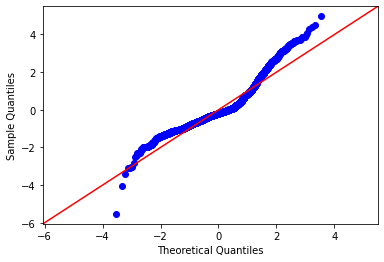

In [41]:
results6 = model6.fit()
fig = sm.graphics.qqplot(results6.resid, dist=stats.norm, line='45', fit=True)
#  The QQ plot looks mostly normal except for the tails

In [42]:
results6.resid

Food_code
11114320    0.880119
71405030   -4.514547
67414010    5.520332
75311012   -0.218132
41301010    0.045878
              ...   
26127140   -0.961918
13230120    0.292163
75440200   -2.348924
27510254   -0.068570
32130300   -0.925992
Length: 4665, dtype: float64

In [43]:
y_train_hat=results6.predict()

In [44]:
y_train

Food_code
11114320     5.05
71405030     0.27
67414010    10.28
75311012     3.11
41301010     3.07
            ...  
26127140     0.88
13230120     4.66
75440200     1.57
27510254     2.10
32130300     0.62
Name: Sugars_total_g, Length: 4665, dtype: float64

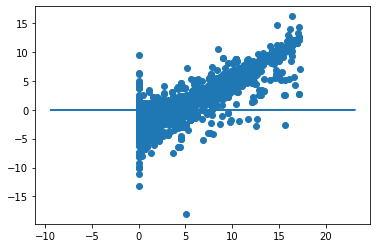

In [45]:
# This does not look good.  Further work needed.
plt.scatter(y_train, results6.resid)
plt.plot(results6.predict(), [0 for i in range(len(X_train6))])

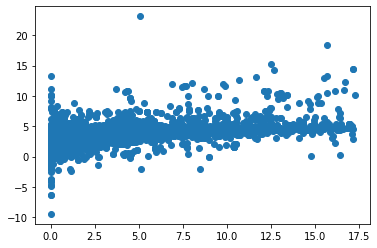

In [46]:
plt.scatter(y_train, y_train_hat)

In [47]:
# looking at some other metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model7 = LinearRegression()
model7.fit(X_train6, y_train)
# evaluate the model
yhat = model7.predict(X_test6)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
rmse= mean_squared_error(y_test, yhat, squared=False)
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)
print('Coefficient of determination: %.2f' % r2_score(y_test, yhat))
# The coefficients
print('Coefficients: \n', model7.coef_)

MAE: 2.607
RMSE: 7.680
Coefficient of determination: -2.96
Coefficients: 
 [ 1.77936314e-01 -1.88407834e-01  1.09437467e-01 -2.18934306e-03
  7.66623669e-03  3.27833644e-01  4.64716770e-01 -7.06965319e-03
  4.37815477e-03 -2.02770847e-02  1.32826036e-03 -2.92177055e-03
  1.32163314e-01  1.35323080e-01 -1.43102975e+00  5.33914880e-01
  1.12408989e-01]


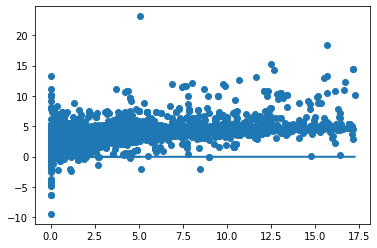

In [48]:
plt.scatter(y_train, model7.predict(X_train6))
plt.plot(y_train, [0 for i in range(len(y_train))])

### Regression Conclusion

There are some significant issues with this model.  I think the basic rules of linear regression should have been addressed earlier in the analysis, particularly the assumption of linearity.  I should have considered that the predictions should never be negative, indicating a different modeling approach or use of an activation function. In the interest of keeping my analysis to 3-4 hours I will have to leave the model at this state.  
  
Applying a model trained on this US dataset to a Brazilian market would have to address differences in the standard diet of each country.  This data is not brand specific but is generalized across all brands of a particular food.  Not only might the available brands be different in a market such as Brazil, but the formulations of the foods might be considerably different.  There would also likely be many foods commonly eaten in Brazil that are not regularly eaten in the US market.  That said, if a model produces good results and can be validated against properly labeled Brazilian test dataset, it would be possible for accurate predictions to be made.

## Rank fruit groups by their sweetness

In [49]:
# These fruit categories are taken from the provided document as it appears to be the same categories used by WW

fruit_categories = ['Apples', 'Bananas', 'Grapes', 'Peaches and nectarines', 'Strawberries', 'Blueberries and other berries',
                    'Citrus fruits', 'Melons', 'Dried fruits', 'Other fruits and fruit salads', 'Pears',
                    'Pineapple', 'Mango and papaya']

In [50]:
# Filter the data based on these categories

fruits = df[df['WWEIA_Category_description'].isin(fruit_categories)]
fruits

,Main_food_description,WWEIA_Category_number,WWEIA_Category_description,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
61100600,"Clementine, raw",6012,Citrus fruits,53,0.81,13.34,10.58,1.8,0.31,0.039,...,0.000,0.000,0.048,0.018,0.0,0.000,0.000,0.000,0.000,85.17
61101010,"Grapefruit, raw",6012,Citrus fruits,42,0.77,10.66,6.89,1.6,0.14,0.021,...,0.000,0.000,0.029,0.008,0.0,0.000,0.000,0.000,0.000,88.06
61101200,"Grapefruit, canned",6012,Citrus fruits,36,0.58,9.15,8.75,0.4,0.10,0.014,...,0.000,0.000,0.019,0.005,0.0,0.000,0.000,0.000,0.000,89.85
61110010,"Kumquat, raw",6012,Citrus fruits,71,1.88,15.90,9.36,6.5,0.86,0.103,...,0.000,0.000,0.124,0.047,0.0,0.000,0.000,0.000,0.000,80.85
61113010,"Lemon, raw",6012,Citrus fruits,29,1.10,9.32,2.50,2.8,0.30,0.039,...,0.000,0.000,0.063,0.026,0.0,0.000,0.000,0.000,0.000,88.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63403010,"Fruit salad, including citrus fruits, with sal...",6018,Other fruits and fruit salads,230,1.97,13.06,8.60,2.1,19.90,2.802,...,0.057,0.004,10.675,1.794,0.0,0.010,0.000,0.000,0.001,64.19
63403020,"Fruit salad, including citrus fruit, with whip...",6018,Other fruits and fruit salads,147,2.29,14.54,9.65,2.3,10.04,3.248,...,0.019,0.000,3.506,0.819,0.0,0.007,0.001,0.002,0.000,72.52
63403030,"Fruit salad, including citrus fruits, with non...",6018,Other fruits and fruit salads,137,2.14,16.60,11.49,2.4,8.04,2.260,...,0.012,0.000,3.531,0.857,0.0,0.000,0.000,0.000,0.000,72.62


In [51]:
# Select just the relevant attributes

fruits = fruits[['Main_food_description','WWEIA_Category_description','Sugars_total_g']]
fruits

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
61100600,"Clementine, raw",Citrus fruits,10.58
61101010,"Grapefruit, raw",Citrus fruits,6.89
61101200,"Grapefruit, canned",Citrus fruits,8.75
61110010,"Kumquat, raw",Citrus fruits,9.36
61113010,"Lemon, raw",Citrus fruits,2.50
...,...,...,...
63403010,"Fruit salad, including citrus fruits, with sal...",Other fruits and fruit salads,8.60
63403020,"Fruit salad, including citrus fruit, with whip...",Other fruits and fruit salads,9.65
63403030,"Fruit salad, including citrus fruits, with non...",Other fruits and fruit salads,11.49


In [52]:
# Group by gategory and aggregate on the mean Sugar value

grouped_fruits = fruits.groupby('WWEIA_Category_description').mean().sort_values('Sugars_total_g', ascending=False)
grouped_fruits

,Sugars_total_g
WWEIA_Category_description,
Dried fruits,59.579474
Bananas,16.585000
Grapes,15.480000
Apples,15.154286
Other fruits and fruit salads,12.940976
Mango and papaya,12.248000
Pineapple,11.782000
Pears,10.448000
Strawberries,10.426667


In [53]:
# It doesn't seem right to me to penalize apples as having high sugar content when we are including candied apples
# Also for other fruit types we are including canned and sweetened varieties

fruits[fruits["WWEIA_Category_description"] == 'Apples']

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
63101000,"Apple, raw",Apples,10.39
63101110,"Applesauce, regular",Apples,14.67
63101120,"Applesauce, unsweetened",Apples,9.39
63101150,"Applesauce, flavored",Apples,14.67
63101210,Apple pie filling,Apples,13.80
63101310,"Apple, baked",Apples,18.99
63401060,"Apple, candied",Apples,24.17


In [54]:
# I will create another grouping just on raw fruits
# Need the space before 'raw' or all versions of strawberries will show up

raw_fruits = fruits[fruits["Main_food_description"].str.contains(' raw')] 

raw_fruits

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
61100600,"Clementine, raw",Citrus fruits,10.58
61101010,"Grapefruit, raw",Citrus fruits,6.89
61110010,"Kumquat, raw",Citrus fruits,9.36
61113010,"Lemon, raw",Citrus fruits,2.50
61116010,"Lime, raw",Citrus fruits,1.69
61119010,"Orange, raw",Citrus fruits,9.35
61125010,"Tangerine, raw",Citrus fruits,10.58
63101000,"Apple, raw",Apples,10.39
63103010,"Apricot, raw",Other fruits and fruit salads,9.24


In [55]:
grouped_raw_fruits = raw_fruits.groupby('WWEIA_Category_description').mean().sort_values('Sugars_total_g', ascending=False)
grouped_raw_fruits

,Sugars_total_g
WWEIA_Category_description,
Grapes,15.480000
Bananas,12.230000
Mango and papaya,10.740000
Other fruits and fruit salads,10.540000
Apples,10.390000
Pineapple,9.850000
Pears,8.400000
Peaches and nectarines,8.140000
Citrus fruits,7.278571


### Fruit Ranking - Conclusion

I am pleased with the ranking of raw fruits, grouped by category, and aggregated by their mean Sugar value.  But this is a case of needing to understand the business context of how the data will be used.  If an aggregation over all foods in each fruit category is desired, then the initial grouped fruits ranking would be more appropriate.

It is also interesting to note that the sugar values are per 100g edible portion of each food so this analysis doesn't really take into account serving size except to assume it is the same 100g for each product.  Lemons and limes are the lowest sugar fruits on the list so their inclusion brings down the average sugar count for all citrus fruits, even though I presume no one sits down and consumes 100g of limes.  Just a little food for thought...